Import necessary modules.

In [1]:
# Import correct modules using accurate aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import TimeSliderChoropleth
from branca.element import Figure
from datetime import datetime
from shapely.geometry import Point, Polygon, MultiPolygon, LinearRing
import geojson
import geopandas as gpd
import fiona
import imageio
import contextily as ctx
import os
import matplotlib.animation as animation
import cv2
from PIL import Image


%matplotlib inline

fiona.drvsupport.supported_drivers['kml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['KML'] = 'rw' # enable KML support which is disabled 

Import all datasets.

In [2]:
planning_area = gpd.read_file('../datasets/dengue_cases_regional/planning-boundary-area.kml')
planning_area

Name                                        Description  \
0    kml_1  <center><table><tr><th colspan='2' align='cent...   
1    kml_2  <center><table><tr><th colspan='2' align='cent...   
2    kml_3  <center><table><tr><th colspan='2' align='cent...   
3    kml_4  <center><table><tr><th colspan='2' align='cent...   
4    kml_5  <center><table><tr><th colspan='2' align='cent...   
5    kml_6  <center><table><tr><th colspan='2' align='cent...   
6    kml_7  <center><table><tr><th colspan='2' align='cent...   
7    kml_8  <center><table><tr><th colspan='2' align='cent...   
8    kml_9  <center><table><tr><th colspan='2' align='cent...   
9   kml_10  <center><table><tr><th colspan='2' align='cent...   
10  kml_11  <center><table><tr><th colspan='2' align='cent...   
11  kml_12  <center><table><tr><th colspan='2' align='cent...   
12  kml_13  <center><table><tr><th colspan='2' align='cent...   
13  kml_14  <center><table><tr><th colspan='2' align='cent...   
14  kml_15  <center><table><tr><th colspan='2' align='cent...   
15  kml_16  <center><table><tr><th colspan='2' align='cent...   
16  kml_17  <center><table><tr><th colspan='2' align='cent...   
17  kml_18  <center><table><tr><th colspan='2' align='cent...   
18  kml_19  <center><table><tr><th colspan='2' align='cent...   
19  kml_20  <center><table><tr><th colspan='2' align='cent...   
20  kml_21  <center><table><tr><th colspan='2' align='cent...   
21  kml_22  <center><table><tr><th colspan='2' align='cent...   
22  kml_23  <center><table><tr><th colspan='2' align='cent...   
23  kml_24  <center><table><tr><th colspan='2' align='cent...   
24  kml_25  <center><table><tr><th colspan='2' align='cent...   
25  kml_26  <center><table><tr><th colspan='2' align='cent...   
26  kml_27  <center><table><tr><th colspan='2' align='cent...   
27  kml_28  <center><table><tr><th colspan='2' align='cent...   
28  kml_29  <center><table><tr><th colspan='2' align='cent...   
29  kml_30  <center><table><tr><th colspan='2' align='cent...   
30  kml_31  <center><table><tr><th colspan='2' align='cent...   
31  kml_32  <center><table><tr><th colspan='2' align='cent...   
32  kml_33  <center><table><tr><th colspan='2' align='cent...   
33  kml_34  <center><table><tr><th colspan='2' align='cent...   
34  kml_35  <center><table><tr><th colspan='2' align='cent...   
35  kml_36  <center><table><tr><th colspan='2' align='cent...   
36  kml_37  <center><table><tr><th colspan='2' align='cent...   
37  kml_38  <center><table><tr><th colspan='2' align='cent...   
38  kml_39  <center><table><tr><th colspan='2' align='cent...   
39  kml_40  <center><table><tr><th colspan='2' align='cent...   
40  kml_41  <center><table><tr><th colspan='2' align='cent...   
41  kml_42  <center><table><tr><th colspan='2' align='cent...   
42  kml_43  <center><table><tr><th colspan='2' align='cent...   
43  kml_44  <center><table><tr><th colspan='2' align='cent...   
44  kml_45  <center><table><tr><th colspan='2' align='cent...   
45  kml_46  <center><table><tr><th colspan='2' align='cent...   
46  kml_47  <center><table><tr><th colspan='2' align='cent...   
47  kml_48  <center><table><tr><th colspan='2' align='cent...   
48  kml_49  <center><table><tr><th colspan='2' align='cent...   
49  kml_50  <center><table><tr><th colspan='2' align='cent...   
50  kml_51  <center><table><tr><th colspan='2' align='cent...   
51  kml_52  <center><table><tr><th colspan='2' align='cent...   
52  kml_53  <center><table><tr><th colspan='2' align='cent...   
53  kml_54  <center><table><tr><th colspan='2' align='cent...   
54  kml_55  <center><table><tr><th colspan='2' align='cent...   

                                             geometry  
0   POLYGON Z ((103.81740 1.29433 0.00000, 103.817...  
1   POLYGON Z ((103.77445 1.39029 0.00000, 103.774...  
2   POLYGON Z ((103.79766 1.34813 0.00000, 103.798...  
3   POLYGON Z ((103.80578 1.41436 0.00000, 103.805...  
4   POLYGON Z ((103.98693 1.39794 0.00000, 103.987...  
5   POLYGON Z ((103.74660 1.4

In [3]:
# Import dengue by clusters region data
region_df = pd.read_csv("../datasets/dengue_clusters_by_region.csv")

# Convert the time column to datetime format
region_df['date'] = pd.to_datetime(region_df['date'])

region_df.head(3)

date  recent_cases_in_cluster_central  recent_cases_in_cluster_east  \
0 2015-07-05                             65.0                          25.0   
1 2015-07-12                             54.0                          27.0   
2 2015-07-19                             45.0                          29.0   

   recent_cases_in_cluster_north  recent_cases_in_cluster_north-east  \
0                           22.0                                15.0   
1                           34.0                                15.0   
2                           37.0                                15.0   

   recent_cases_in_cluster_west  
0                           9.0  
1                           6.0  
2                           5.0

In [4]:
region_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                279 non-null    datetime64[ns]
 1   recent_cases_in_cluster_central     279 non-null    float64       
 2   recent_cases_in_cluster_east        279 non-null    float64       
 3   recent_cases_in_cluster_north       279 non-null    float64       
 4   recent_cases_in_cluster_north-east  279 non-null    float64       
 5   recent_cases_in_cluster_west        279 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 13.2 KB


In [5]:
# Import the latitude/longitude data
coordinates = pd.read_csv("../datasets/regions.csv")
coordinates

REGION_N                                     geometry
0     CENTRAL REGION  POINT (103.8404361073424 1.354955429489439)
1        EAST REGION   POINT (103.9633839670078 1.32796829772857)
2       NORTH REGION  POINT (103.8371178947091 1.415039440959387)
3  NORTH-EAST REGION  POINT (103.8678180616185 1.365201551765161)
4        WEST REGION  POINT (103.7049024145101 1.341611988409421)

In [6]:
coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   REGION_N  5 non-null      object
 1   geometry  5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


---
### Regression Line to Explore Relationships between Features

/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gp/T/ipykernel_5061/2446512648.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(region_df.corr(), dtype=None)
/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gp/T/ipykernel_5061/2446512648.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(region_df.corr(), vmin=0.0, vmax=1.0, mask=mask, cmap='cool', annot=True, linewidths = 0.3)


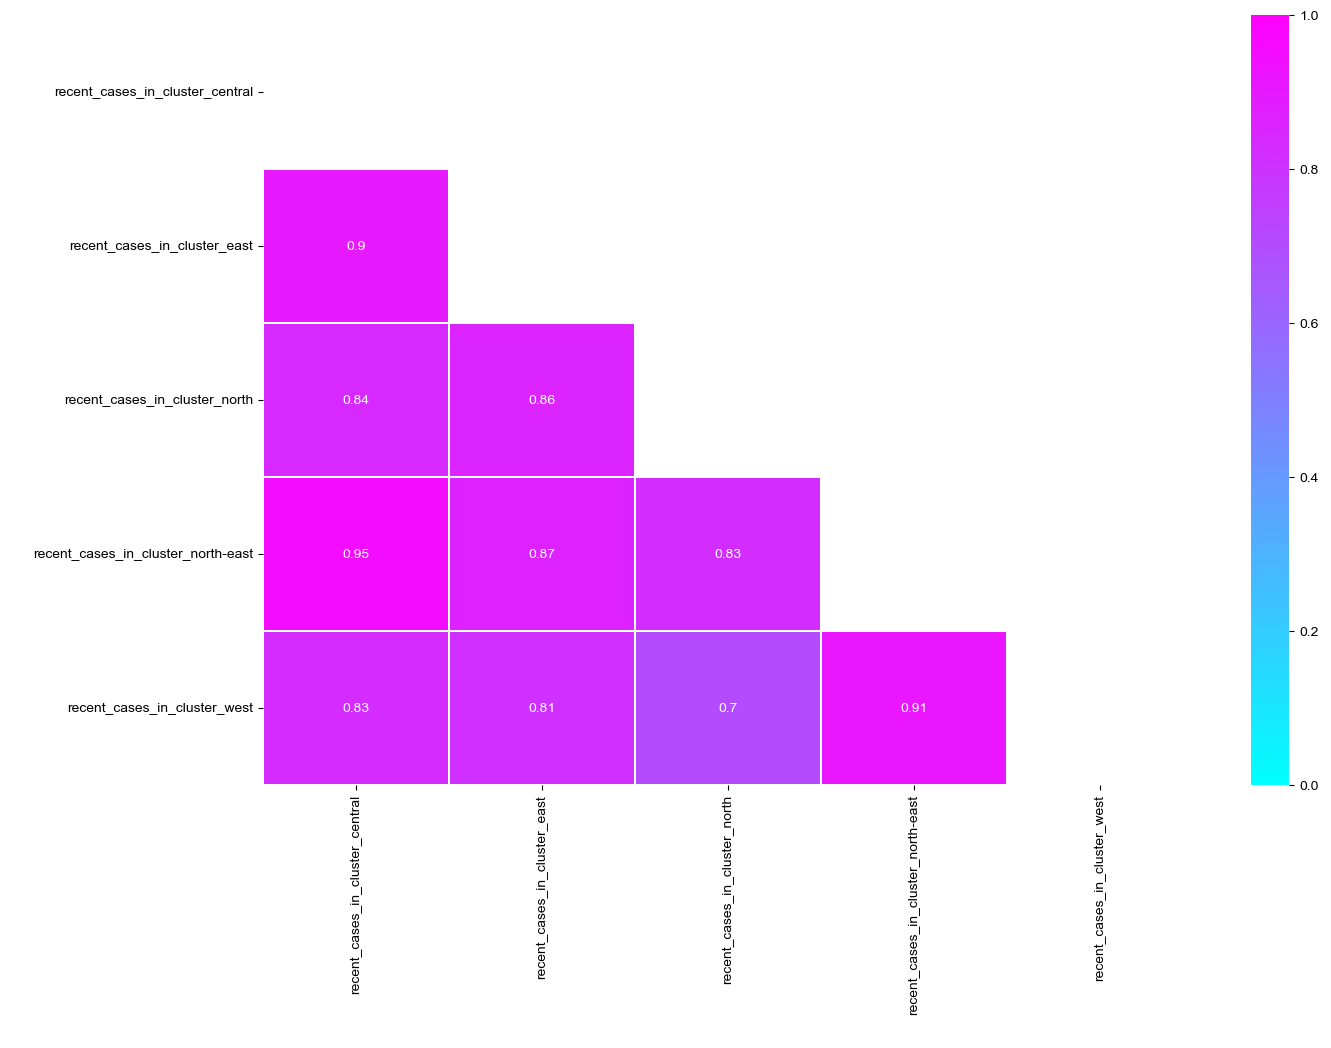

In [7]:
# First use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features
# Establish figure size
fig = plt.subplots(figsize=(15, 10))

# Create a mask for the top half (repeated values) of the heat map
mask = np.zeros_like(region_df.corr(), dtype=None)
mask[np.triu_indices_from(mask)]=True

# Plot the correlation heat map
sns.heatmap(region_df.corr(), vmin=0.0, vmax=1.0, mask=mask, cmap='cool', annot=True, linewidths = 0.3)
sns.set(font_scale=0.5)

# Display the heat map
plt.show();

---
### Time Series Line Plots

#### Total Dengue Cases by Region from 2015 to 2020

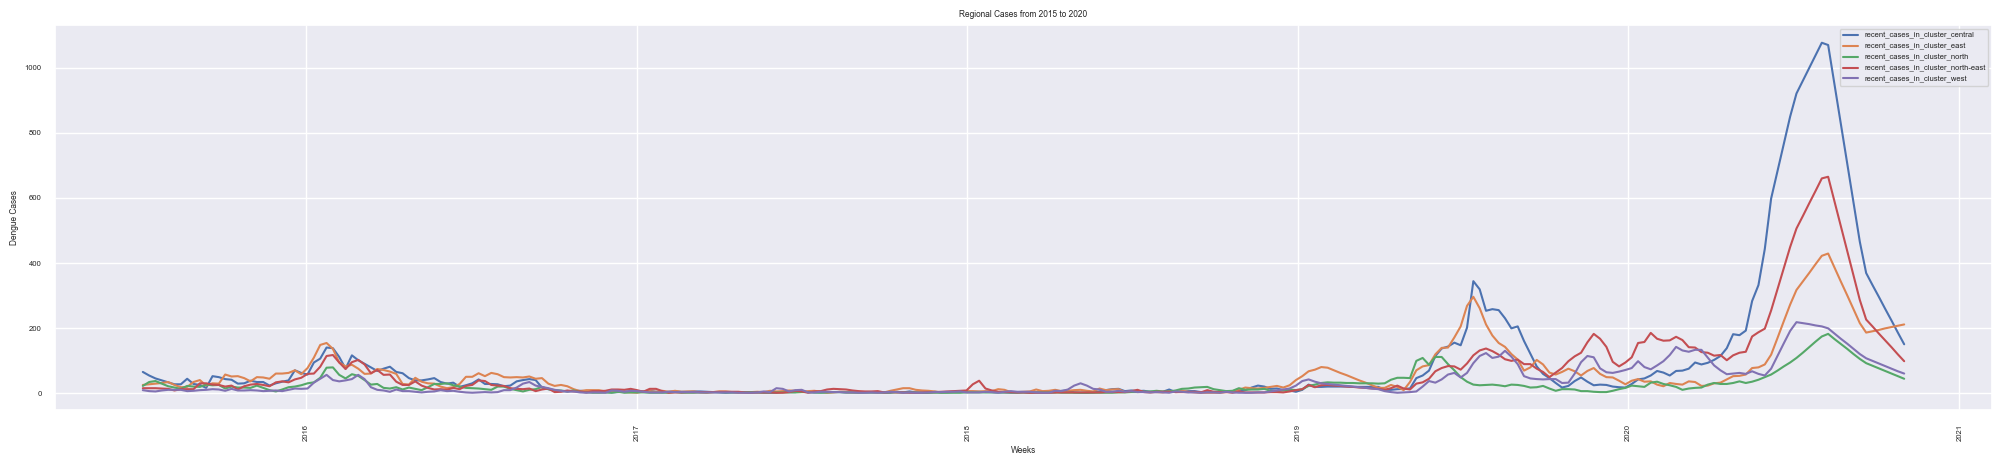

In [8]:
# Regional Dengue Cases over the weeks, 2015 -2020
plt.figure(figsize=(25, 5))

# Define X and y
x = region_df['date']
y = region_df[['recent_cases_in_cluster_central',
               'recent_cases_in_cluster_east', 
               'recent_cases_in_cluster_north',
               'recent_cases_in_cluster_north-east',
               'recent_cases_in_cluster_west']]

plt.plot(x,y)

plt.title(label='Regional Cases from 2015 to 2020')
plt.xlabel(xlabel='Weeks')
plt.ylabel(ylabel='Dengue Cases')
plt.xticks(rotation=90)

# Add legend
plt.legend(['recent_cases_in_cluster_central',
            'recent_cases_in_cluster_east', 
            'recent_cases_in_cluster_north',
            'recent_cases_in_cluster_north-east',
            'recent_cases_in_cluster_west'], loc='upper right');

---
### Folium Plot

Plotting markers on the Singapore Map to show where the 5 different clusters are.

In [9]:
from folium.features import DivIcon

In [10]:
# Creating Basemap (sg_map) on which markers will be places
fig=Figure(width=950,height=550)
sg_map=folium.Map(location=[1.354955429489439, 103.8404361073424],tiles='cartodbpositron',zoom_start=10)
fig.add_child(sg_map)

# Adding circles to the sg_map
folium.Marker(location=[1.354955429489439, 103.8404361073424],
              popup='<strong>CENTRAL REGION</strong>',
              tooltip='<strong>Click here to see Popup</strong>').add_to(sg_map)

folium.Marker(location=[1.32796829772857, 103.9633839670078],
              popup='<strong>EAST REGION</strong>',
              tooltip='<strong>Click here to see Popup</strong>').add_to(sg_map)

folium.Marker(location=[1.415039440959387, 103.8371178947091],
              popup='<strong>NORTH REGION</strong>',
              tooltip='<strong>Click here to see Popup</strong>').add_to(sg_map)

folium.Marker(location=[1.365201551765161, 103.8678180616185],
              popup='<strong>NORTH-EAST REGION</strong>',
              tooltip='<strong>Click here to see Popup</strong>').add_to(sg_map)

folium.Marker(location=[1.341611988409421, 103.7049024145101],
              popup='<strong>WEST REGION</strong>',
              tooltip='<strong>Click here to see Popup</strong>').add_to(sg_map)

# Adding markers to the sg_map
folium.Marker(location=[1.354955429489439, 103.8404361073424],
              icon=DivIcon(icon_size=(30,30),
                           icon_anchor=(20,5),
                           html=f'<div style="font-size: 10pt; color: red;">%s</div>' % str('central'))).add_to(sg_map)

folium.Marker(location=[1.32796829772857, 103.9633839670078],
              icon=DivIcon(icon_size=(30,30),
                           icon_anchor=(12.5,5),
                           html=f'<div style="font-size: 10pt; color: green;">%s</div>' % str('east'))).add_to(sg_map)

folium.Marker(location=[1.415039440959387, 103.8371178947091],
              icon=DivIcon(icon_size=(30,30),
                           icon_anchor=(15,5),
                           html=f'<div style="font-size: 10pt; color: green;">%s</div>' % str('north'))).add_to(sg_map)

folium.Marker(location=[1.365201551765161, 103.8678180616185],
              icon=DivIcon(icon_size=(30,30),
                           icon_anchor=(20,5),
                           html=f'<div style="font-size: 10pt; color: red;">%s</div>' % str('northeast'))).add_to(sg_map)

folium.Marker(location=[1.341611988409421, 103.7049024145101],
              icon=DivIcon(icon_size=(30,30),
                           icon_anchor=(15,5),
                           html=f'<div style="font-size: 10pt; color: blue;">%s</div>' % str('west'))).add_to(sg_map)

sg_map

Convert KML file, ‘planning-boundary-area.kml’, into a GeoJSON, ‘planning-boundary-area.geojson’ using an online tool.

In [11]:
# Read ‘planning-boundary-area.geojson’ and add it to sg_map
geo_json_map = geojson.load(open('../datasets/dengue_cases_regional/planning-boundary-area.geojson'))

folium.Choropleth(
    geo_data = geo_json_map,
    fill_color = "steelblue",
    fill_opacity = 0.4,
    line_color = "steelblue",
    line_opacity = 0.9
).add_to(sg_map)

sg_map

Pre-process datasets to visualize changes in the number of dengue cases with respect to time.
> * `region_df.csv` should contain variables `date`, label encoded `Region_ID`, and `color` - to be converted into `data_dictionary` with specific format
> * `planning_area.geojson` should contain label encoded `Region_ID` and `Geometry`

1. Create data_dictionary with dengue cases over time.

In [12]:
# Check orginal columns of region_df.csv
region_df.columns

Index(['date', 'recent_cases_in_cluster_central',
       'recent_cases_in_cluster_east', 'recent_cases_in_cluster_north',
       'recent_cases_in_cluster_north-east', 'recent_cases_in_cluster_west'],
      dtype='object')

In [13]:
region_df

date  recent_cases_in_cluster_central  recent_cases_in_cluster_east  \
0   2015-07-05                             65.0                          25.0   
1   2015-07-12                             54.0                          27.0   
2   2015-07-19                             45.0                          29.0   
3   2015-07-26                             39.0                          31.0   
4   2015-08-02                             33.0                          34.0   
..         ...                              ...                           ...   
274 2020-10-04                            296.0                         194.0   
275 2020-10-11                            259.0                         199.0   
276 2020-10-18                            223.0                         203.0   
277 2020-10-25                            186.0                         207.0   
278 2020-11-01                            150.0                         211.0   

     recent_cases_in_cluster_north  recent_cases_in_cluster_north-east  \
0                             22.0                                15.0   
1                             34.0                                15.0   
2                             37.0                                15.0   
3                             29.0                                14.0   
4                             21.0                                13.0   
..                             ...                                 ...   
274                           76.0                               183.0   
275                           68.0                               162.0   
276                           60.0                               141.0   
277                           52.0                               119.0   
278                           44.0                                98.0   

     recent_cases_in_cluster_west  
0                             9.0  
1                             6.0  
2                             5.0  
3                             8.0  
4                            10.0  
..                            ...  
274                          91.0  
275                          83.0  
276                          75.0  
277                          67.0  
278                          60.0  

[279 rows x 6 columns]

In [14]:
# Melt the DataFrame
df_melted = region_df.melt(id_vars=['date'], var_name='region', value_name='cases')

# Extract the region name from the column name
df_melted['region'] = df_melted['region'].str.replace('recent_cases_in_cluster_', '').str.replace('-', ' ')

# Sort the DataFrame by date
df_melted = df_melted.sort_values('date')

# Print df_melted
df_melted

date      region  cases
0    2015-07-05     central   65.0
558  2015-07-05       north   22.0
837  2015-07-05  north east   15.0
1116 2015-07-05        west    9.0
279  2015-07-05        east   25.0
...         ...         ...    ...
557  2020-11-01        east  211.0
836  2020-11-01       north   44.0
278  2020-11-01     central  150.0
1115 2020-11-01  north east   98.0
1394 2020-11-01        west   60.0

[1395 rows x 3 columns]

In [15]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1395 non-null   datetime64[ns]
 1   region  1395 non-null   object        
 2   cases   1395 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 43.6+ KB


In [16]:
# Create dictionary for the purpose of label encoding the planning_areas
id_dict={'central': '0',
         'west': '1',
         'north': '2',
         'east': '3',
         'north east': '4'}

# Create IDs using the above dictionary
df_melted['region_id']=df_melted['region'].map(id_dict)

In [17]:
# Check out the full range of cases
# Maximum number of cases
print(f'The maximum number of cases is {max(df_melted.cases)}.')

# Minimum number of cases
print(f'The minimum number of cases is {min(df_melted.cases)}.')

The maximum number of cases is 1077.0.
The minimum number of cases is 1.0.


In [18]:
# Divide the range of cases into 10 bins and assign each part a color
# Assign a color to each day of every planning_area based on the total number of active dengue cases
bins=np.linspace(0,1078,11)
bins

array([   0. ,  107.8,  215.6,  323.4,  431.2,  539. ,  646.8,  754.6,
        862.4,  970.2, 1078. ])

In [19]:
# Coloring planning areas with active dengue cases
df_melted['color']=pd.cut(df_melted['cases'],bins,labels=['#FFE6C7',
                                                          '#FFE0B2',
                                                          '#FFCC80',
                                                          '#FFB74D', 
                                                          '#FFA726', 
                                                          '#FF9800', 
                                                          '#F57C00', 
                                                          '#EF6C00', 
                                                          '#E65100', 
                                                          '#FF5722'],include_lowest=False)

# Coloring planning areas with no active cases but previously had
df_melted['color'].replace(np.nan,'#32CD32',inplace=True)

In [20]:
# Isolate required three columns of the dataset for further analysis
folium_csv=df_melted[['date','region_id','color']]
folium_csv.head()

date region_id    color
0    2015-07-05         0  #FFE6C7
558  2015-07-05         2  #FFE6C7
837  2015-07-05         4  #FFE6C7
1116 2015-07-05         1  #FFE6C7
279  2015-07-05         3  #FFE6C7

In [21]:
# TimeSliderChoropleth takes time in milliseconds and also takes the whole dataset in the form of an area name indexed dictionary
folium_csv['date']=(folium_csv['date'].astype(int)// 10**9).astype('U10')
dengue_dict={}

for i in folium_csv['region_id'].unique():
    dengue_dict[i]={}
    for j in folium_csv[folium_csv['region_id']==i].set_index(['region_id']).values:   
        dengue_dict[i][j[0]]={'color':j[1],'opacity':0.7}

/var/folders/1k/lmhy97td4h17yfgn7vlzp0ph0000gp/T/ipykernel_5061/3480454319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  folium_csv['date']=(folium_csv['date'].astype(int)// 10**9).astype('U10')


In [22]:
folium_csv.head(25)

date region_id    color
0     1436054400         0  #FFE6C7
558   1436054400         2  #FFE6C7
837   1436054400         4  #FFE6C7
1116  1436054400         1  #FFE6C7
279   1436054400         3  #FFE6C7
1     1436659200         0  #FFE6C7
559   1436659200         2  #FFE6C7
838   1436659200         4  #FFE6C7
280   1436659200         3  #FFE6C7
1117  1436659200         1  #FFE6C7
2     1437264000         0  #FFE6C7
839   1437264000         4  #FFE6C7
560   1437264000         2  #FFE6C7
281   1437264000         3  #FFE6C7
1118  1437264000         1  #FFE6C7
840   1437868800         4  #FFE6C7
282   1437868800         3  #FFE6C7
561   1437868800         2  #FFE6C7
3     1437868800         0  #FFE6C7
1119  1437868800         1  #FFE6C7
4     1438473600         0  #FFE6C7
841   1438473600         4  #FFE6C7
562   1438473600         2  #FFE6C7
1120  1438473600         1  #FFE6C7
283   1438473600         3  #FFE6C7

In [23]:
list(dengue_dict.items())[0] 

('0',
 {'1436054400': {'color': '#FFE6C7', 'opacity': 0.7},
  '1436659200': {'color': '#FFE6C7', 'opacity': 0.7},
  '1437264000': {'color': '#FFE6C7', 'opacity': 0.7},
  '1437868800': {'color': '#FFE6C7', 'opacity': 0.7},
  '1438473600': {'color': '#FFE6C7', 'opacity': 0.7},
  '1439078400': {'color': '#FFE6C7', 'opacity': 0.7},
  '1439683200': {'color': '#FFE6C7', 'opacity': 0.7},
  '1440288000': {'color': '#FFE6C7', 'opacity': 0.7},
  '1440892800': {'color': '#FFE6C7', 'opacity': 0.7},
  '1441497600': {'color': '#FFE6C7', 'opacity': 0.7},
  '1442102400': {'color': '#FFE6C7', 'opacity': 0.7},
  '1442707200': {'color': '#FFE6C7', 'opacity': 0.7},
  '1443312000': {'color': '#FFE6C7', 'opacity': 0.7},
  '1443916800': {'color': '#FFE6C7', 'opacity': 0.7},
  '1444521600': {'color': '#FFE6C7', 'opacity': 0.7},
  '1445126400': {'color': '#FFE6C7', 'opacity': 0.7},
  '1445731200': {'color': '#FFE6C7', 'opacity': 0.7},
  '1446336000': {'color': '#FFE6C7', 'opacity': 0.7},
  '1446940800': {'colo

2. GeoJSON must be string serialized according to the planning_area name.

In [24]:
planning_boundary_area=gpd.read_file('../datasets/dengue_cases_regional/planning-boundary-area.geojson')
planning_boundary_area

Name               PLN_AREA_N PLN_AREA_C  CA_IND           REGION_N  \
0    kml_1              BUKIT MERAH         BM   False     CENTRAL REGION   
1    kml_2            BUKIT PANJANG         BP   False        WEST REGION   
2    kml_3              BUKIT TIMAH         BT   False     CENTRAL REGION   
3    kml_4  CENTRAL WATER CATCHMENT         CC   False       NORTH REGION   
4    kml_5                   CHANGI         CH   False        EAST REGION   
5    kml_6            CHOA CHU KANG         CK   False        WEST REGION   
6    kml_7                 CLEMENTI         CL   False        WEST REGION   
7    kml_8                  HOUGANG         HG   False  NORTH-EAST REGION   
8    kml_9              JURONG EAST         JE   False        WEST REGION   
9   kml_10              JURONG WEST         JW   False        WEST REGION   
10  kml_11                  KALLANG         KL   False     CENTRAL REGION   
11  kml_12             LIM CHU KANG         LK   False       NORTH REGION   
12  kml_13                   MANDAI         MD   False       NORTH REGION   
13  kml_14    NORTH-EASTERN ISLANDS         NE   False  NORTH-EAST REGION   
14  kml_15                   NOVENA         NV   False     CENTRAL REGION   
15  kml_16                PASIR RIS         PR   False        EAST REGION   
16  kml_17                  PIONEER         PN   False        WEST REGION   
17  kml_18                  PUNGGOL         PG   False  NORTH-EAST REGION   
18  kml_19               ANG MO KIO         AM   False  NORTH-EAST REGION   
19  kml_20                    BEDOK         BD   False        EAST REGION   
20  kml_21                   BISHAN         BS   False     CENTRAL REGION   
21  kml_22                 BOON LAY         BL   False        WEST REGION   
22  kml_23              BUKIT BATOK         BK   False        WEST REGION   
23  kml_24               QUEENSTOWN         QT   False     CENTRAL REGION   
24  kml_25                  SELETAR         SL   False  NORTH-EAST REGION   
25  kml_26                SEMBAWANG         SB   False       NORTH REGION   
26  kml_27                 SENGKANG         SE   False  NORTH-EAST REGION   
27  kml_28                SERANGOON         SG   False  NORTH-EAST REGION   
28  kml_29                  SIMPANG         SM   False       NORTH REGION   
29  kml_30         SOUTHERN ISLANDS         SI   False     CENTRAL REGION   
30  kml_31             SUNGEI KADUT         SK   False       NORTH REGION   
31  kml_32                 TAMPINES         TM   False        EAST REGION   
32  kml_33                  TANGLIN         TN   False     CENTRAL REGION   
33  kml_34                   TENGAH         TH   False        WEST REGION   
34  kml_35                TOA PAYOH         TP   False     CENTRAL REGION   
35  kml_36                     TUAS         TS   False        WEST REGION   
36  kml_37            DOWNTOWN CORE         DT    True     CENTRAL REGION   
37  kml_38              MARINA EAST         ME    True     CENTRAL REGION   
38  kml_39             MARINA SOUTH         MS    True     CENTRAL REGION   
39  kml_40                   MUSEUM         MU    True     CENTRAL REGION   
40  kml_41                   NEWTON         NT    True     CENTRAL REGION   
41  kml_42                  ORCHARD         OR    True     CENTRAL REGION   
42  kml_43                   OUTRAM         OT    True     CENTRAL REGION   
43  kml_44             RIVER VALLEY         RV    True     CENTRAL REGION   
44  kml_45                   ROCHOR         RC    True     CENTRAL REGION   
45  kml_46          SINGAPORE RIVER         SR    True     CENTRAL REGION   
46  kml_47             STRAITS VIEW         SV    True     CENTRAL REGION   
47  kml_48               CHANGI BAY         CB   False        EAST REGION   
48  kml_49            MARINE PARADE         MP   False     CENTRAL REGION   
49  kml_50                  GEYLANG         GL   False     CENTRAL REGION   
50  kml_51               PAYA LEBAR         PL   False        EAST REGION   
51

In [25]:
# Extract only relevant columns
planning_boundary_area.drop(['Name',
                             'PLN_AREA_N',
                             'PLN_AREA_C', 
                             'CA_IND', 
                             'REGION_C',
                             'INC_CRC', 
                             'FMEL_UPD_D'], axis=1, inplace=True)

planning_boundary_area 

REGION_N                                           geometry
0      CENTRAL REGION  POLYGON Z ((103.81740 1.29433 0.00000, 103.817...
1         WEST REGION  POLYGON Z ((103.77445 1.39029 0.00000, 103.774...
2      CENTRAL REGION  POLYGON Z ((103.79766 1.34813 0.00000, 103.798...
3        NORTH REGION  POLYGON Z ((103.80578 1.41436 0.00000, 103.805...
4         EAST REGION  POLYGON Z ((103.98693 1.39794 0.00000, 103.987...
5         WEST REGION  POLYGON Z ((103.74660 1.40541 0.00000, 103.746...
6         WEST REGION  POLYGON Z ((103.76707 1.33120 0.00000, 103.767...
7   NORTH-EAST REGION  POLYGON Z ((103.88152 1.38774 0.00000, 103.882...
8         WEST REGION  POLYGON Z ((103.74350 1.34451 0.00000, 103.744...
9         WEST REGION  POLYGON Z ((103.72813 1.34888 0.00000, 103.728...
10     CENTRAL REGION  POLYGON Z ((103.86277 1.33030 0.00000, 103.863...
11       NORTH REGION  POLYGON Z ((103.69148 1.43792 0.00000, 103.690...
12       NORTH REGION  POLYGON Z ((103.82439 1.43505 0.00000, 103.824...
13  NORTH-EAST REGION  POLYGON Z ((104.07474 1.43084 0.00000, 104.086...
14     CENTRAL REGION  POLYGON Z ((103.83599 1.34168 0.00000, 103.837...
15        EAST REGION  POLYGON Z ((103.95695 1.39202 0.00000, 103.958...
16        WEST REGION  POLYGON Z ((103.68611 1.32777 0.00000, 103.686...
17  NORTH-EAST REGION  POLYGON Z ((103.91459 1.42670 0.00000, 103.915...
18  NORTH-EAST REGION  POLYGON Z ((103.85721 1.39654 0.00000, 103.857...
19        EAST REGION  POLYGON Z ((103.93193 1.34309 0.00000, 103.935...
20     CENTRAL REGION  POLYGON Z ((103.84297 1.36429 0.00000, 103.842...
21        WEST REGION  POLYGON Z ((103.72042 1.32824 0.00000, 103.720...
22        WEST REGION  POLYGON Z ((103.76408 1.37001 0.00000, 103.764...
23     CENTRAL REGION  POLYGON Z ((103.78460 1.31109 0.00000, 103.784...
24  NORTH-EAST REGION  POLYGON Z ((103.88683 1.40145 0.00000, 103.886...
25       NORTH REGION  POLYGON Z ((103.84781 1.46052 0.00000, 103.847...
26  NORTH-EAST REGION  POLYGON Z ((103.88848 1.40105 0.00000, 103.889...
27  NORTH-EAST REGION  POLYGON Z ((103.88239 1.34452 0.00000, 103.882...
28       NORTH REGION  POLYGON Z ((103.86386 1.42626 0.00000, 103.861...
29     CENTRAL REGION  POLYGON Z ((103.79558 1.26185 0.00000, 103.802...
30       NORTH REGION  POLYGON Z ((103.74948 1.44967 0.00000, 103.759...
31        EAST REGION  POLYGON Z ((103.97066 1.34146 0.00000, 103.970...
32     CENTRAL REGION  POLYGON Z ((103.82394 1.30040 0.00000, 103.824...
33        WEST REGION  POLYGON Z ((103.73756 1.34650 0.00000, 103.737...
34     CENTRAL REGION  POLYGON Z ((103.84477 1.34394 0.00000, 103.845...
35        WEST REGION  POLYGON Z ((103.60121 1.21510 0.00000, 103.601...
36     CENTRAL REGION  POLYGON Z ((103.86655 1.30386 0.00000, 103.866...
37     CENTRAL REGION  POLYGON Z ((103.88205 1.28334 0.00000, 103.908...
38     CENTRAL REGION  POLYGON Z ((103.87594 1.27795 0.00000, 103.901...
39     CENTRAL REGION  POLYGON Z ((103.84575 1.30092 0.00000, 103.846...
40     CENTRAL REGION  POLYGON Z ((103.84577 1.30984 0.00000, 103.846...
41     CENTRAL REGION  POLYGON Z ((103.83533 1.30806 0.00000, 103.835...
42     CENTRAL REGION  POLYGON Z ((103.84313 1.28778 0.00000, 103.843...
43     CENTRAL REGION  POLYGON Z ((103.83059 1.30400 0.00000, 103.830...
44     CENTRAL REGION  POLYGON Z ((103.85617 1.30908 0.00000, 103.856...
45     CENTRAL REGION  POLYGON Z ((103.83410 1.29248 0.00000, 103.834...
46     CENTRAL REGION  POLYGON Z ((103.86723 1.27229 0.00000, 103.891...
47        EAST REGION  POLYGON Z ((104.04855 1.35772 0.00000, 104.052...
48     CENTRAL REGION  POLYGON Z ((103.90806 1.30982 0.00000, 103.908...
49     CENTRAL REGION  POLYGON Z ((103.90179 1.30975 0.00000, 103.901...
50        EAST REGION  POLYGON Z ((103.91854 1.38129 0.00000, 103.918...
51        WEST REGION  POLYGON Z ((103.74485 1.15316 0.00000, 103.738...
52        WEST REGION  POLYGON Z ((103.69866 1.41869 0.00000, 103.698...
53       NORTH REGION  POLYGON Z ((103.79281 1.46048 0.00000, 103.792..

In [26]:
# Create dictionary for the purpose of label encoding the region_n
id_dict={'CENTRAL REGION': '0',
         'WEST REGION': '1',
         'NORTH REGION': '2',
         'EAST REGION': '3',
         'NORTH-EAST REGION': '4'}

# Create IDs using the above dictionary
planning_boundary_area['region_id']=planning_boundary_area['REGION_N'].map(id_dict)
planning_boundary_area.drop(columns='REGION_N',inplace=True)

In [27]:
# Group region_ids into 5 different categories
planning_boundary_area.region_id.unique()

array(['0', '1', '2', '3', '4'], dtype=object)

In [28]:
planning_boundary_area.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   geometry   55 non-null     geometry
 1   region_id  55 non-null     object  
dtypes: geometry(1), object(1)
memory usage: 1008.0+ bytes


In [29]:
# Create a new geo_json DataFrame 
# Create a new dictionary with the required format
new_data = {'region_id': planning_boundary_area['region_id'].unique(),
            'geometry': [list() for _ in range(5)]}

In [30]:
# Loop through the data dictionary and append the data to the new dictionary
for index, row in planning_boundary_area.iterrows():
    if row['region_id'] == '0': 
        new_data['geometry'][0].append(row['geometry'])
    elif row['region_id'] == '1':
        new_data['geometry'][1].append(row['geometry'])
    elif row['region_id'] == '2':
        new_data['geometry'][2].append(row['geometry']) 
    elif row['region_id'] == '3': 
        new_data['geometry'][3].append(row['geometry'])
    else:
        new_data['geometry'][4].append(row['geometry'])

In [31]:
# Create the GeoDataFrame
gdf = gpd.GeoDataFrame.from_dict(new_data)

In [32]:
# Convert the list of Polygon objects into a single MultiPolygon object
for i in range(len(gdf)):
    gdf['geometry'][i] = MultiPolygon(gdf.geometry[i])

In [33]:
gdf

region_id                                           geometry
0         0  MULTIPOLYGON Z (((103.817404504805 1.294331920...
1         1  MULTIPOLYGON Z (((103.774450261573 1.390289453...
2         2  MULTIPOLYGON Z (((103.805776584821 1.414355000...
3         3  MULTIPOLYGON Z (((103.986925137504 1.397942551...
4         4  MULTIPOLYGON Z (((103.881516457454 1.387738868...

In [34]:
# Define the multipolygon coordinates for each region
central_coords = gdf.geometry[0]
east_coords = gdf.geometry[3]
north_coords = gdf.geometry[2]
northeast_coords = gdf.geometry[4]
west_coords = gdf.geometry[1]

# Create a feature group to hold the boundary outlines
boundary_group = folium.FeatureGroup(name='Region boundaries')

# Add each region boundary to the feature group
folium.GeoJson(central_coords).add_to(boundary_group)
folium.GeoJson(east_coords).add_to(boundary_group)
folium.GeoJson(north_coords).add_to(boundary_group)
folium.GeoJson(northeast_coords).add_to(boundary_group)
folium.GeoJson(west_coords).add_to(boundary_group)

# Add the feature group to the map
sg_map.add_child(boundary_group)

# Display the map
sg_map

In [37]:
# Define the multipolygon coordinates for each region
central_coords = gdf.geometry[0]
east_coords = gdf.geometry[3]
north_coords = gdf.geometry[2]
northeast_coords = gdf.geometry[4]
west_coords = gdf.geometry[1]

# Create a feature group to hold the boundary outlines
boundary_group = folium.FeatureGroup(name='Region boundaries')

# Define the colors for each region
region_colors = {
    '0': 'red',
    '3': 'green',
    '2': 'green',
    '4': 'red',
    '1': 'blue'
}

# Add each region boundary to the feature group with a different color
folium.GeoJson(central_coords, style_function=lambda x: {'color': region_colors['0'], 'weight': 2, 'opacity': 0.7}).add_to(boundary_group)
folium.GeoJson(east_coords, style_function=lambda x: {'color': region_colors['3'], 'weight': 2, 'opacity': 0.7}).add_to(boundary_group)
folium.GeoJson(north_coords, style_function=lambda x: {'color': region_colors['2'], 'weight': 2, 'opacity': 0.7}).add_to(boundary_group)
folium.GeoJson(northeast_coords, style_function=lambda x: {'color': region_colors['4'], 'weight': 2, 'opacity': 0.7}).add_to(boundary_group)
folium.GeoJson(west_coords, style_function=lambda x: {'color': region_colors['1'], 'weight': 2, 'opacity': 0.7}).add_to(boundary_group)

# Add the feature group to the map
sg_map.add_child(boundary_group)

# Display the map
sg_map

Import the TimeSliderChoropleth plugin.

In [41]:
# Add plugin to sg_map
g = TimeSliderChoropleth(
    gdf.set_index('region_id').to_json(),
    styledict=dengue_dict).add_to(sg_map)

sg_map

In [35]:
sg_map.save('sg_map.html')

Create a GIF out of a TimeSliderChoropleth.

In [36]:
type(sg_map)

folium.folium.Map